## Exporting: Example 03 <br>
Created by Brandon Tucker in 2023 <br> 
<br>
In this example, we will use the fort14togdf() function to visualize an adcirc mesh from a <br>
fort.14 file as GeoDataFrame and extract information about each element. <br>
<br>
This function is used in the preprocessing for downscaling (meshRepLen2raster). <br> 
<br>
For this example, we will use the fort14 file associated with the NC9 mesh. <br>
**The following cell imports necessary packages and functions.**

In [1]:
import sys
#import Kalpana functions from github repository
sys.path.append(r'C:/Users/brand/Github/Kalpana')
from kalpana.export import *

#import additional functions used for this example
sys.path.append(r'C:/Users/brand/Github/Kalpana/examples')
from example_functions import *

**The following cell defines our parameters for the fort14togdf() function.**

In [2]:
## path of the input fort 14 file
filein = r'C:/Users/brand/Documents/Coastal/Kalpana/inputs/fort.14'

## coordinate system of the fort14 input
## Fort 14 almost always uses latitude and longitude
epsgIn = 4326

## coordinate system of the output shapefile
## For this example we use latitude and longitude
epsgOut = 4326

Now, let's call the fort14togdf() function with the parameters we defined. <br>
**The following cell runs fort14togdf() and stores the output as a geodataframe.** <br>

In [3]:
## call fort14togdf() to create a geodataframe object
gdf = fort14togdf(filein, epsgIn, epsgOut)

**The following cell saves the geodataframe as a .shp file, if desired.** <br>
This may take a while.

In [ ]:
gdf.to_file(r'myFilePath.shp')

**The following cells create visualizations of the Full Domain and North Carolina Meshes.** <br>
Colormaps are associated with element elevation or element area. <br>
They may take a while to generate.

In [4]:
## SETUP
    # add columns to gdf for area and side length which we use in the following visualizations
    # these columns are automatically created if you use an epsgOut that is *not* lat/long
    # since we used lat/long we need to create them manually
gdf2 = gdf.to_crs(32618)
gdf['area'] = [geom.area for geom in gdf2['geometry']] #element area
gdf['repLen'] = [geom.length/3 for geom in gdf2['geometry']] #element representative side length

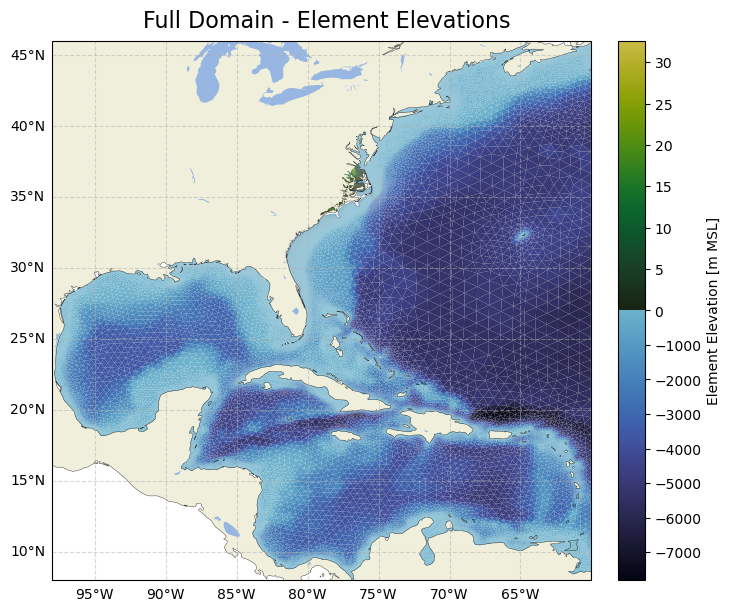

In [5]:
# Full Domain Elevations
plot_mesh(gdf, var = 'zmean', xlims = [-98, -60], ylims = [8, 46], 
          title = 'Full Domain - Element Elevations', cbar_label = 'Element Elevation [m MSL]',
          ticks = [-7000, -6000, -5000, -4000, -3000, -2000, -1000, 0, 5, 10, 15, 20, 25, 30])

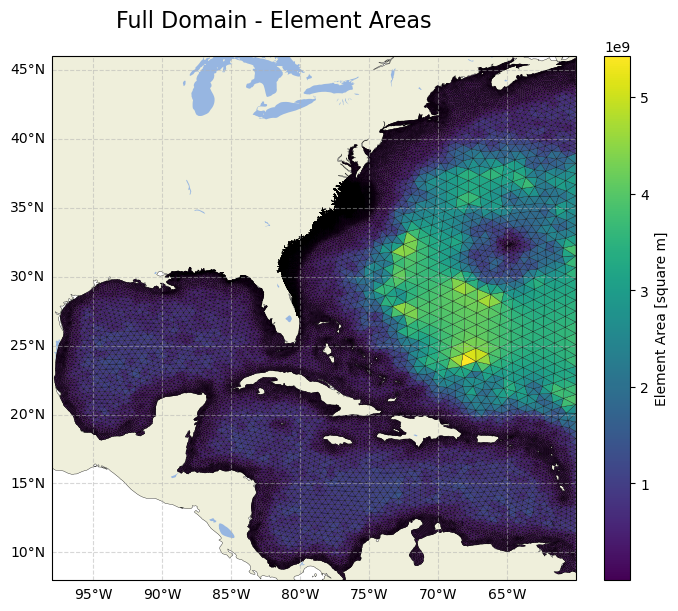

In [6]:
# Full Domain Areas
plot_mesh(gdf, var = 'area', xlims = [-98, -60], ylims = [8, 46], 
          title = 'Full Domain - Element Areas', cbar_label = 'Element Area [square m]')

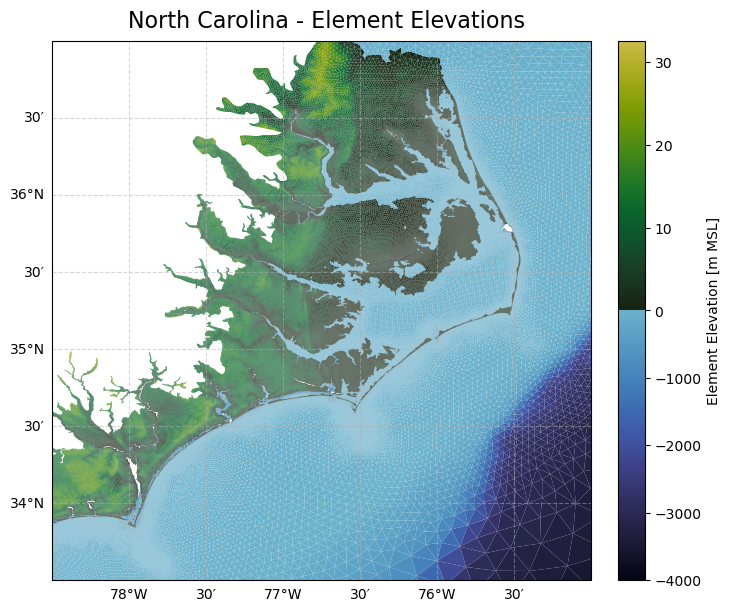

In [9]:
# North Carolina Elevations
plot_mesh(gdf, var = 'zmean', xlims = [-78.5, -75], ylims = [33.5, 37], 
          title = 'North Carolina - Element Elevations', cbar_label = 'Element Elevation [m MSL]', 
          vmin = -4000, ticks = [-4000, -3000, -2000, -1000, 0, 10, 20, 30], background_map = False)

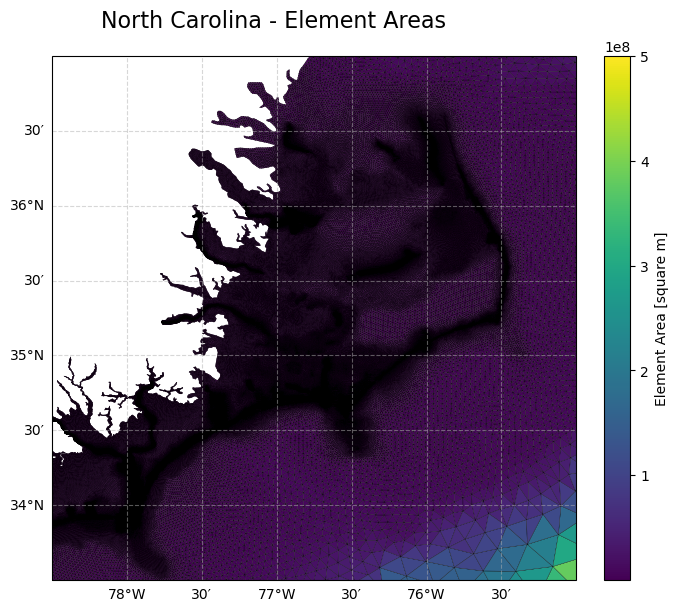

In [10]:
# North Carolina Elevations
plot_mesh(gdf, var = 'area', xlims = [-78.5, -75], ylims = [33.5, 37], 
          title = 'North Carolina - Element Areas', cbar_label = 'Element Area [square m]', 
          vmax = 5e8, background_map = False)

Good luck with Kalpana! See you in future examples! <br>